In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
# 自定义类
class MyObject:
    def __init__(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)

    def __repr__(self):
        return f"MyObject({self.__dict__})"

# 竿组类，里面包含竿、线、鱼饵、钩子、渔轮、浮漂
class Tackle:
    def __init__(self, rod:MyObject, line:MyObject, bait:MyObject, hook:MyObject, reel:MyObject, float:MyObject, leader:MyObject = None):
        self.rod:MyObject = rod
        self.line:MyObject = line
        self.bait:MyObject = bait
        self.hook:MyObject = hook
        self.reel:MyObject = reel
        self.float:MyObject = float
        self.leader:MyObject = leader

    def __repr__(self):
        return f"Tackle({self.__dict__})"
    
# 给dataframe添加一个方法getMyObject, 输入一个string， 通过name==nameString来查找对应的行，然后返回一个MyObject对象
def getMyObject(df, nameString):
    row = df[df['name'] == nameString]
    if row.empty:
        return None
    return MyObject(**row.to_dict(orient='records')[0])

pd.DataFrame.getMyObject = getMyObject



In [17]:
workbookName = "./xlsx/tackle.xlsx"

# 读取excel文件中所有的sheet， 从第3个开始到最后一个，每个sheet取个dataframe的名字; 忽略第一行、第三行和第四行，用第二行作为列名
dfRods = pd.read_excel(workbookName, sheet_name= 'Rods', header=0, skiprows=[0,2,3])
dfLines = pd.read_excel(workbookName, sheet_name= 'Lines', header=0, skiprows=[0,2,3])
dfReels = pd.read_excel(workbookName, sheet_name= 'Reels', header=0, skiprows=[0,2,3])
dfLeaders = pd.read_excel(workbookName, sheet_name= 'Leaders', header=0, skiprows=[0,2,3])
dfBaits = pd.read_excel(workbookName, sheet_name= 'Baits', header=0, skiprows=[0,2,3])
dfFloats = pd.read_excel(workbookName, sheet_name= 'Floats', header=0, skiprows=[0,2,3])
dfRods.head()

,id,quality,item_type,sub_type,name,mark,art_id,sale_type,buy_item,buy_cost,...,group_id,Unnamed: 12,Unnamed: 13,weight,min,max,min.1,max.1,length,hardness_type
0,3012001,[道具品质]普通,[物品类型]钓竿,[鱼竿]直柄竿,Spinning_rods01,路亚-直柄竿,NaN,[出售类型]折价出售,item_currency_diamond,110,...,1,[鱼轮]纺车轮,NaN,120,7,21,0,5000,240,[竿硬度]L(软)
1,3012002,[道具品质]优秀,[物品类型]钓竿,[鱼竿]直柄竿,Spinning_rods02,路亚-直柄竿,NaN,[出售类型]折价出售,item_currency_coins,12000,...,2,[鱼轮]纺车轮,NaN,130,5,15,0,5000,194,[竿硬度]M(中)
2,3012003,[道具品质]稀有,[物品类型]钓竿,[鱼竿]直柄竿,Spinning_rods03,路亚-直柄竿,NaN,[出售类型]折价出售,item_currency_diamond,5500,...,3,[鱼轮]纺车轮,NaN,115,5,15,0,4500,198,[竿硬度]M(中)
3,3012004,[道具品质]普通,[物品类型]钓竿,[鱼竿]直柄竿,Spinning_rods04,路亚-直柄竿,NaN,[出售类型]折价出售,item_currency_diamond,80,...,4,[鱼轮]纺车轮,NaN,98,5,15,0,3500,208,[竿硬度]M(中)
4,3013001,[道具品质]优秀,[物品类型]钓竿,[鱼竿]枪柄竿,Casting_rods01,路亚-枪柄竿,NaN,[出售类型]折价出售,item_currency_coins,10000,...,5,[鱼轮]水滴轮,[鱼轮]鼓轮,110,5,15,0,5500,213,[竿硬度]M(中)


In [14]:
testSpinningRods04 = dfRods.getMyObject("Spinning_rods04")
print(testSpinningRods04)
print('weight is:', testSpinningRods04.weight)

MyObject({'id': 3012004, 'quality': '[道具品质]普通', 'item_type': '[物品类型]钓竿', 'sub_type': '[鱼竿]直柄竿', 'name': 'Spinning_rods04', 'mark': '路亚-直柄竿', 'art_id': nan, 'sale_type': '[出售类型]折价出售', 'buy_item': 'item_currency_diamond', 'buy_cost': 80, 'durability': 20000, 'group_id': 4, 'Unnamed: 12': '[鱼轮]纺车轮', 'Unnamed: 13': nan, 'weight': 98, 'min': 5, 'max': 15, 'min.1': 0, 'max.1': 3500, 'length': 208, 'hardness_type': '[竿硬度]M(中)'})
weight is: 98


In [ ]:
# 接下来处理各项属性：远抛能力、承重能力、轻量化、敏感度、精准度
# 基本的方法是：先定义一个计算方法；然后手工组合出一个最大值，最小值；然后在这个区间里做log对数缩放

# 先处理钓重能力
def getWeightCapacity(self:Tackle):
    return min()

钓重，rods的制约非常明显

In [18]:
weight_points = dfRods['max.1'].values
print(weight_points)

[5000 5000 4500 3500 5500 3500 5000 7000 7000]


In [22]:
reelDrags = dfReels['drag'].values
# append reel drags to the end of weight_points
weight_points = np.append(weight_points, reelDrags)
print(weight_points)

[ 5000  5000  4500  3500  5500  3500  5000  7000  7000  3000  5000  4500
  3500  3500  6000 10000]


In [23]:
lineDrags = dfLines['drag'].values
# append line drags to the end of weight_points
weight_points = np.append(weight_points, lineDrags)

# exclude everything greater than 7000
weight_points = weight_points[weight_points <= 7000]
print(weight_points)

[5000 5000 4500 3500 5500 3500 5000 7000 7000 3000 5000 4500 3500 3500
 6000]


[5071.98537717 4951.52680231 4557.13941066 3529.26932434 5596.24366835
 3486.76419503 5001.32337749 6989.21980191 7051.01231374 2968.87924172
 4917.24410248 4475.86435226 3516.1507594  3522.81555807 6035.1809558 ]


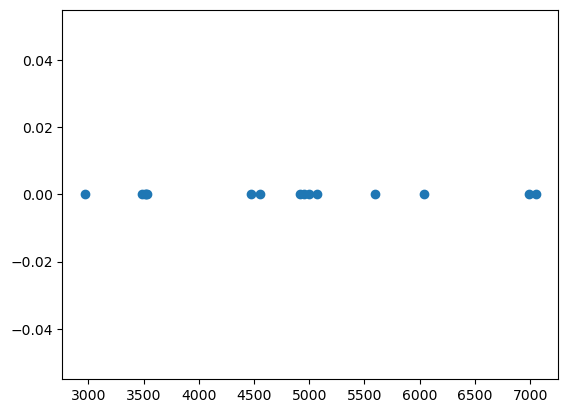

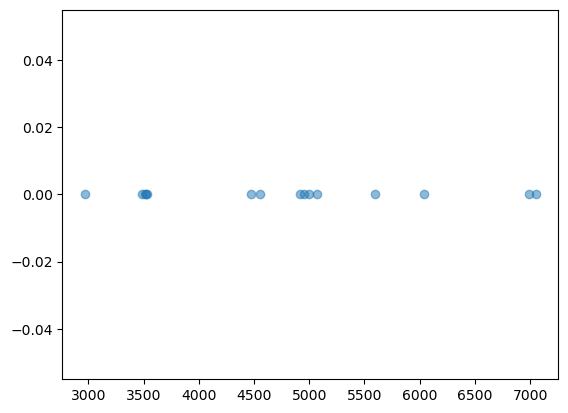

In [30]:
# add random noise to weight_points(std 50)
weight_points = weight_points + np.random.normal(0, 50, weight_points.shape)
print(weight_points)

# plot weight points as scatter points
plt.scatter(weight_points, np.zeros_like(weight_points))
plt.show()

# plot weight points as scatter points, but points with same values are shown obviously
plt.scatter(weight_points, np.zeros_like(weight_points), alpha=0.5)
plt.show()

In [32]:
# 用最小值2500， 最大值7500，在这个范围里算一个钓重的float
minWeight = 2500
maxWeight = 7500
weightFloats = (weight_points - minWeight) / (maxWeight - minWeight)
print(weightFloats)

[0.51439708 0.49030536 0.41142788 0.20585386 0.61924873 0.19735284
 0.50026468 0.89784396 0.91020246 0.09377585 0.48344882 0.39517287
 0.20323015 0.20456311 0.70703619]


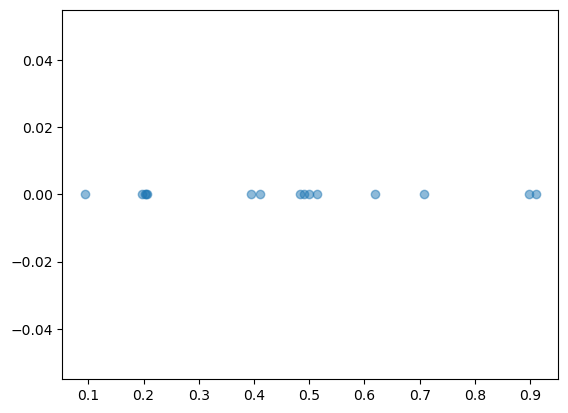

In [48]:
# plot weight floats as scatter points
plt.scatter(weightFloats, np.zeros_like(weightFloats), alpha=0.5)
plt.show()

承重浮点数计算公式：

weight = min(rod.line_weight,  reel.line_weight

minWeight = 2500

maxWeight = 7500

weightIndicator = (weight_points - minWeight) / (maxWeight - minWeight)

# 计算轻量化

In [34]:
rodWeights = dfRods['weight'].values
reelWeights = dfReels['weight'].values
print(rodWeights)

[120 130 115  98 110  96  90 180 210]


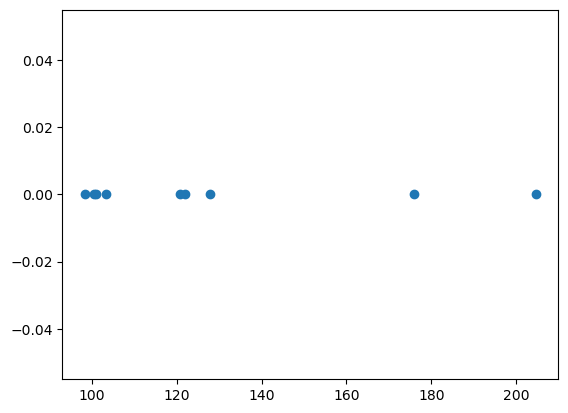

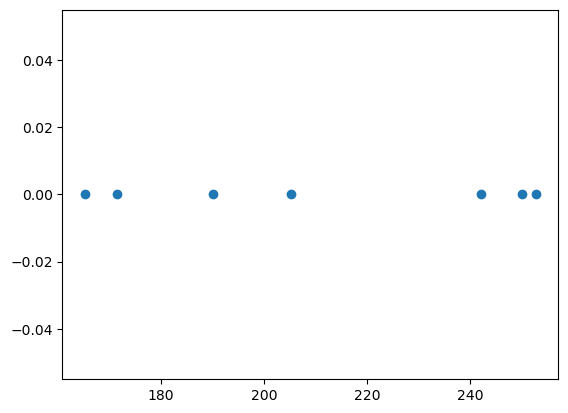

In [38]:
# add noise to rod weights and reel weights
rodWeightsNoised = rodWeights + np.random.normal(0, 10, rodWeights.shape)
reelWeightsNoised = reelWeights + np.random.normal(0, 10, reelWeights.shape)

# plot rod weights as scatter points
plt.scatter(rodWeightsNoised, np.zeros_like(rodWeights))
plt.show()

# plot reel weights as scatter points
plt.scatter(reelWeightsNoised, np.zeros_like(reelWeights))
plt.show()

In [40]:
# calc  max reel + rod weight
maxReelRodWeight = np.max(rodWeightsNoised) + np.max(reelWeightsNoised)
print(maxReelRodWeight)

# calc min reel + rod weight
minReelRodWeight = np.min(rodWeightsNoised) + np.min(reelWeightsNoised)
print(minReelRodWeight)

457.367822084267
263.6487296828268


In [46]:
# calc combined reel + rod weight float
combinedWeights = rodWeightsNoised[:, np.newaxis] + reelWeightsNoised[np.newaxis, :]
print(combinedWeights.shape)
print(combinedWeights)

(9, 7)
[[287.1648352  374.72927432 293.47633576 312.0415882  327.27297056
  364.09709529 372.13038209]
 [286.08169157 373.64613068 292.39319213 310.95844457 326.18982692
  363.01395166 371.04723846]
 [293.0442333  380.60867241 299.35573385 317.9209863  333.15236865
  369.97649339 378.00978018]
 [268.60842969 356.1728688  274.91993025 293.48518269 308.71656504
  345.54068978 353.57397658]
 [265.80188715 353.36632626 272.1133877  290.67864015 305.9100225
  342.73414723 350.76743403]
 [266.1756839  353.74012302 272.48718446 291.0524369  306.28381926
  343.10794399 351.14123079]
 [263.64872968 351.2131688  269.96023024 288.52548268 303.75686504
  340.58098977 348.61427657]
 [341.16509391 428.72953303 347.47659447 366.04184691 381.27322927
  418.097354   426.1306408 ]
 [369.80338297 457.36782208 376.11488353 394.68013597 409.91151832
  446.73564306 454.76892986]]


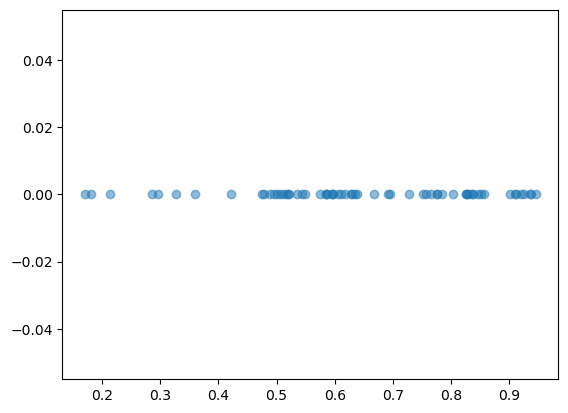

In [47]:
min = 250
max = 500

combinedWeightsFloats = (max - combinedWeights) / (max - min)

# plot combined reel + rod weight floats as scatter points, alpha=0.5
plt.scatter(combinedWeightsFloats, np.zeros_like(combinedWeightsFloats), alpha=0.5)
plt.show()

轻量化公式为：

min = 250

max = 500

combineWeight = rod.weight + reel.weight

combinedWeightFloat = (max - combinedWeight) / (max - min)

# 远抛能力

1. 确定各参数的数值范围和权重

2. 组合公式


In [50]:
kRodLength = dfRods['length'].values*0.1
rodHardnessType = dfRods['hardness_type'].values
# [竿硬度]L(软)对应1.1， [竿硬度]M(中)对应1.0， [竿硬度]MH(中硬)对应0.9
kRodHardness = np.where(rodHardnessType == '[竿硬度]L(软)', 1.1, np.where(rodHardnessType == '[竿硬度]M(中)', 1.0, 0.9))
print(kRodHardness)


[1.1 1.  1.  1.  1.  1.1 1.1 0.9 0.9]


In [51]:
reelSize = dfReels['spool_size'].values
kReelSize = (reelSize-1000)/5000 + 1
print(kReelSize)

[1.2 1.3 1.3 1.2 1.2 1.2 1.3]


In [54]:
lineD = dfLines['diameter'].values
kLineDiameter = 1.2 - (lineD * 0.004)
print(kLineDiameter)



[1.1   1.14  1.056]


In [55]:
lineMaterial = dfLines['sub_type'].values
# [主线]尼龙线 对应0.9， [主线]编织线 对应1.1， [主线]氟碳线对应1.0
kLineMaterial = np.where(lineMaterial == '[主线]尼龙线', 0.9, np.where(lineMaterial == '[主线]编织线', 1.1, 1.0))
print(kLineMaterial)

# if (lineMaterial == "[主线]尼龙线")
# {
#     kLineMaterial = 0.9;
# }
# else if (lineMaterial == "[主线]编织线")
# {
#     kLineMaterial = 1.1;
# }
# else
# {
#     kLineMaterial = 1.0;
# }

[0.9 1.1 1. ]


In [56]:
baitWeight = dfBaits['weight'].values
# bait weight < 7, k = 0.9; bait weight between 7 and 28, k = 1.1; bait weight > 28, k = 0.95
kBaitWeight = np.where(baitWeight < 7, 0.9, np.where(baitWeight > 28, 0.95, 1.1))
print(kBaitWeight)

# if (baitWeight < 7)
# {
#     kBaitWeight = 0.9;
# }
# else if (baitWeight > 28)
# {
#     kBaitWeight = 0.95;
# }
# else
# {
#     kBaitWeight = 1.1;
# }

[0.9 0.9 0.9 0.9 0.9 1.1 0.9 1.1 1.1 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
 0.9 0.9 1.1 1.1 1.1 1.1 1.1 1.1 1.1 0.9 0.9 0.9 0.9]


In [57]:
kLine = kLineDiameter * kLineMaterial
kRod = kRodLength * kRodHardness
# kLine，kRod，kReelSize，kBaitWeight作为四个维度，broadcast相乘得到一个4维的矩阵
castPotential = kLine[:, np.newaxis, np.newaxis, np.newaxis] * kRod[np.newaxis, :, np.newaxis, np.newaxis] * kReelSize[np.newaxis, np.newaxis, :, np.newaxis] * kBaitWeight[np.newaxis, np.newaxis, np.newaxis, :]
print(castPotential.shape)

(3, 9, 7, 31)


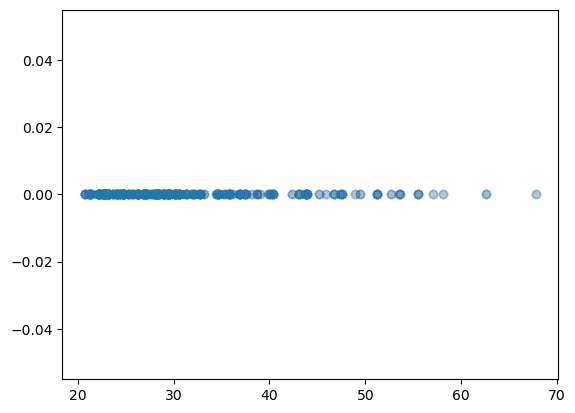

In [60]:
# plot castPotential as scatter points, alpha=0.5
plt.scatter(castPotential, np.zeros_like(castPotential), alpha=0.01)
plt.show()

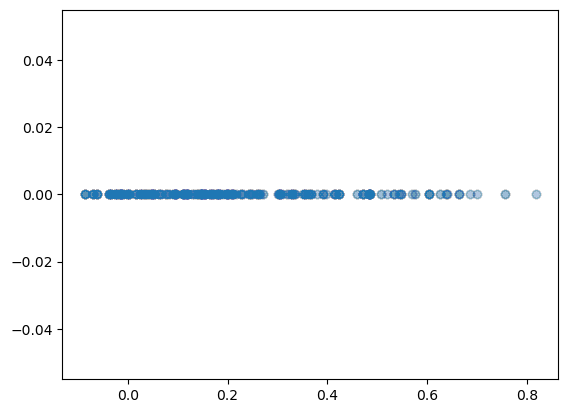

In [96]:
loggedCastPotential = np.power(castPotential,0.1)
loggedCastPotential = np.log(loggedCastPotential)/np.log(1.14) - 2.4
# loggedCastPotential = np.log(castPotential)/np.log(85)
# loggedCastPotential = np.log(castPotential)/np.log(4)-2.1


plt.scatter(loggedCastPotential, np.zeros_like(loggedCastPotential), alpha=0.01)
plt.show()